In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from analysis_functions import Analysis

In [104]:
skolik_schuld_path = "../../../results/continuous/skolik_arch/schuld_datareup/localskolik_outscaling/ZZ_obs/skolik_optimal_hyper_mse"
skolik_baseline_path = "../../../results/continuous/skolik_arch/baseline/localskolik_outscaling/ZZ_obs/skolik_optimal_hyper_mse"
uqc_2qubits = "../../../results/continuous/uqc/globalskolik_outscaling/XZ_obs/multi_qubit_full_encoding_final/2qubits_5layers"
uqc_4qubits = "../../../results/continuous/uqc/globalskolik_outscaling/XZ_obs/multi_qubit_full_encoding_final/4qubits_5layers"
uqc_1qubits = "../../../results/continuous/uqc/globalskolik_outscaling/XZ_obs/skolik_actual_optimal_hyper_mse"

In [105]:
skolik_schuld = Analysis(skolik_schuld_path)
skolik_baseline = Analysis(skolik_baseline_path)
uqc_2qubits = Analysis(uqc_2qubits)
uqc_4qubits = Analysis(uqc_4qubits)
uqc_1qubits = Analysis(uqc_1qubits)

In [4]:
skolik_schuld_moving_average = skolik_schuld.get_moving_average(25)
for i in range(len(skolik_schuld_moving_average)):
    skolik_schuld_moving_average[i] = skolik_schuld_moving_average[i][:1000]
skolik_baseline_moving_average = skolik_baseline.get_moving_average(25)
uqc_2qubits_moving_average = uqc_2qubits.get_moving_average(25)
uqc_4qubits_moving_average = uqc_4qubits.get_moving_average(25)
uqc_1qubits_moving_average = uqc_1qubits.get_moving_average(25)
uqc_1qubits_moving_average.pop(1)
for i in range(len(uqc_1qubits_moving_average)):
    uqc_1qubits_moving_average[i] = uqc_1qubits_moving_average[i][:1000]

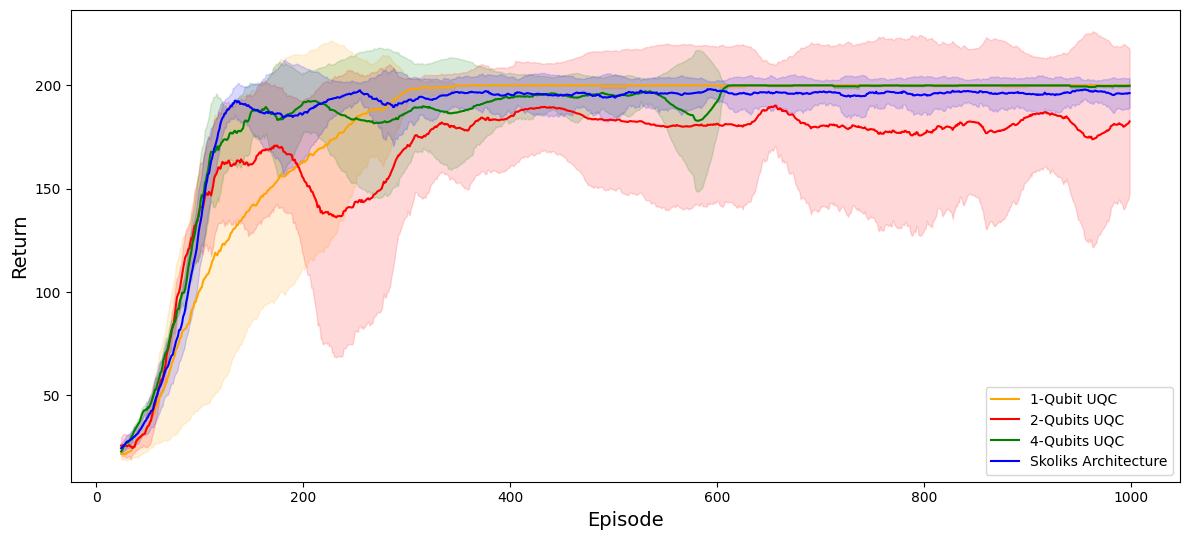

In [19]:
# calculate the mean and standard deviation of the moving averages for each agent
means_single_qubit = np.mean(uqc_1qubits_moving_average, axis=0)
stds_single_qubit = np.std(uqc_1qubits_moving_average, axis=0)
means_2q5l_full = np.mean(uqc_2qubits_moving_average, axis=0)
stds_2q5l_full = np.std(uqc_2qubits_moving_average, axis=0)
means_4q_5l_full = np.mean(uqc_4qubits_moving_average, axis=0)
stds_4q_5l_full = np.std(uqc_4qubits_moving_average, axis=0)
means_skolik = np.mean(skolik_schuld_moving_average, axis=0)
stds_skolik = np.std(skolik_schuld_moving_average, axis=0)


# plot the mean of the moving averages for each agent with different colors
fig, axs = plt.subplots(1, 1, tight_layout = True, figsize=(12, 5.5), sharey = True)
axs.plot(means_single_qubit, color='orange', linewidth=1.5, label='1-Qubit UQC')
axs.plot(means_2q5l_full, color='red', linewidth=1.5, label='2-Qubits UQC')
axs.plot(means_4q_5l_full, color='green', linewidth=1.5, label='4-Qubits UQC')
axs.plot(means_skolik, color='blue', linewidth=1.5, label='Skoliks Architecture')

area_single_qubit = np.trapz(means_single_qubit[25:1000])
area_2q5l_full = np.trapz(means_2q5l_full[25:])
area_4q_5l_full = np.trapz(means_4q_5l_full[25:])


# add shaded regions for the standard deviation of the moving averages
axs.fill_between(range(len(means_single_qubit)), means_single_qubit-stds_single_qubit, means_single_qubit+stds_single_qubit, color='orange', alpha=0.15)
axs.fill_between(range(len(means_2q5l_full)), means_2q5l_full-stds_2q5l_full, means_2q5l_full+stds_2q5l_full, color='red', alpha=0.15)
axs.fill_between(range(len(means_4q_5l_full)), means_4q_5l_full-stds_4q_5l_full, means_4q_5l_full+stds_4q_5l_full, color='green', alpha=0.15)
axs.fill_between(range(len(means_skolik)), means_skolik-stds_skolik, means_skolik+stds_skolik, color='blue', alpha=0.15)

# add labels and title
axs.set_xlabel('Episode', fontsize=14)
axs.set_ylabel('Return', fontsize=14)
axs.legend()

# show the plot
plt.show()

In [6]:
mean_gradients_skolik, variance_gradients_skolik = skolik_schuld.get_gradients_all_params()
mean_gradients_baseline, variance_gradients_baseline = skolik_baseline.get_gradients_all_params()

In [7]:
mean_gradients_skolik_smoothed = pd.Series(mean_gradients_skolik).rolling(250).mean()
mean_gradients_baseline_smoothed = pd.Series(mean_gradients_baseline).rolling(250).mean()
variance_gradients_skolik_smoothed = pd.Series(variance_gradients_skolik).rolling(250).mean()
variance_gradients_baseline_smoothed = pd.Series(variance_gradients_baseline).rolling(250).mean()

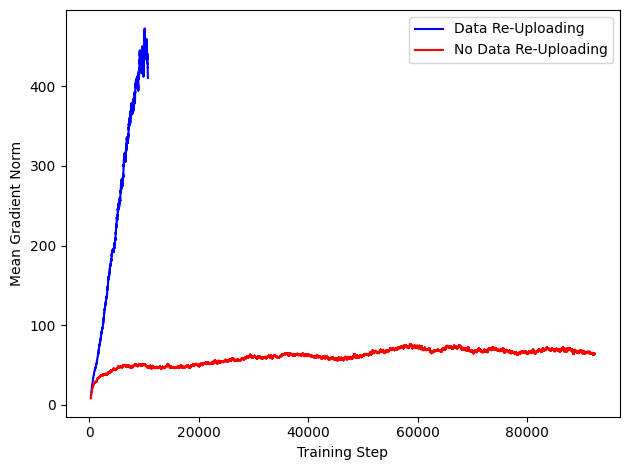

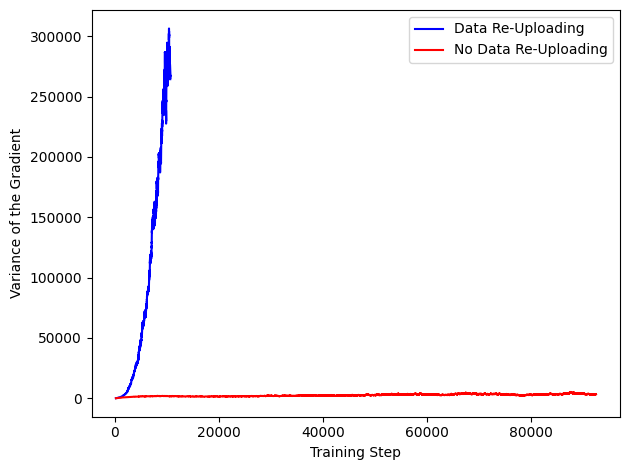

In [18]:
fig, axs = plt.subplots(1, 1, tight_layout = True, figsize=(6.4,4.8), sharey = True)
axs.plot(mean_gradients_skolik_smoothed, color='blue', linewidth=1.5, label='Data Re-Uploading')
axs.plot(mean_gradients_baseline_smoothed, color='red', linewidth=1.5, label='No Data Re-Uploading')
axs.set_xlabel("Training Step")
axs.set_ylabel("Mean Gradient Norm")
axs.legend()
plt.show()

fig, axs = plt.subplots(1, 1, tight_layout = True, figsize=(6.4,4.8), sharey = True)
axs.plot(variance_gradients_skolik_smoothed, color='blue', linewidth=1.5, label='Data Re-Uploading')
axs.plot(variance_gradients_baseline_smoothed, color='red', linewidth=1.5, label='No Data Re-Uploading')
axs.set_xlabel("Training Step")
axs.set_ylabel("Variance of the Gradient")
axs.legend()
plt.show()

In [106]:
mean_gradients_single_qubit, variance_gradients_single_qubit = uqc_1qubits.get_gradients_all_params()
mean_gradients_2qubits, variance_gradients_2qubits = uqc_2qubits.get_gradients_all_params()
mean_gradients_4qubits, variance_gradients_4qubits = uqc_4qubits.get_gradients_all_params()

In [107]:
# Let's calculate a moving average of the gradients every 200 steps
mean_gradients_single_qubit_smoothed = pd.Series(mean_gradients_single_qubit).rolling(250).mean()
mean_gradients_2qubits_smoothed = pd.Series(mean_gradients_2qubits).rolling(250).mean()
mean_gradients_4qubits_smoothed = pd.Series(mean_gradients_4qubits).rolling(250).mean()
variance_gradients_single_qubit_smoothed = pd.Series(variance_gradients_single_qubit).rolling(250).mean()
variance_gradients_2qubits_smoothed = pd.Series(variance_gradients_2qubits).rolling(250).mean()
variance_gradients_4qubits_smoothed = pd.Series(variance_gradients_4qubits).rolling(250).mean()

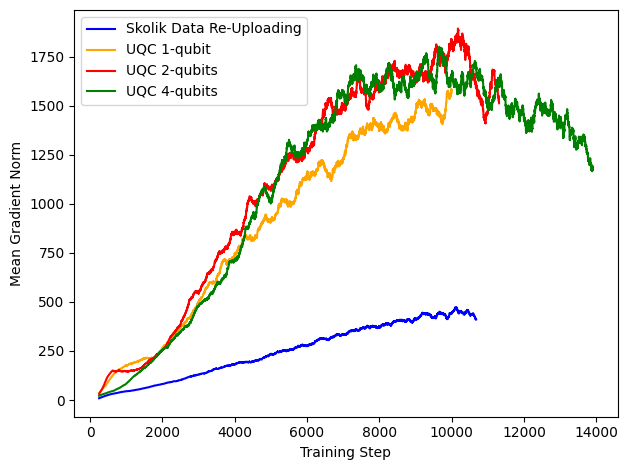

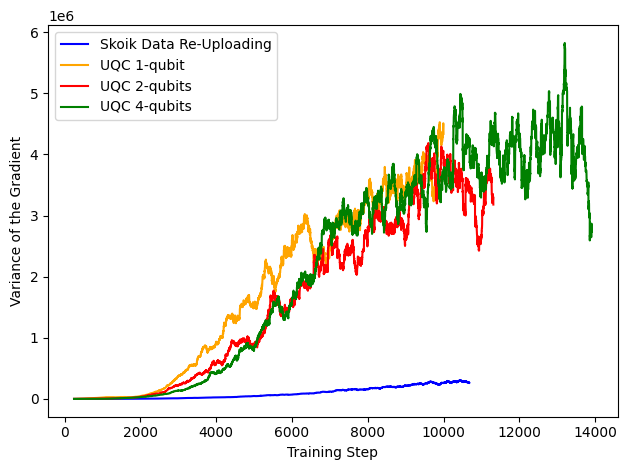

In [111]:
fig, axs = plt.subplots(1, 1, tight_layout = True, figsize=(6.4,4.8), sharey = True)
axs.plot(mean_gradients_skolik_smoothed, color='blue', linewidth=1.5, label='Skolik Data Re-Uploading')
axs.plot(mean_gradients_single_qubit_smoothed[:10000], color='orange', linewidth=1.5, label='UQC 1-qubit')
axs.plot(mean_gradients_2qubits_smoothed, color='red', linewidth=1.5, label='UQC 2-qubits')
axs.plot(mean_gradients_4qubits_smoothed, color='green', linewidth=1.5, label='UQC 4-qubits')
axs.set_xlabel("Training Step")
axs.set_ylabel("Mean Gradient Norm")
axs.legend()
plt.show()

fig, axs = plt.subplots(1, 1, tight_layout = True, figsize=(6.4,4.8), sharey = True)
axs.plot(variance_gradients_skolik_smoothed, color='blue', linewidth=1.5, label='Skoik Data Re-Uploading')
axs.plot(variance_gradients_single_qubit_smoothed[:10000], color='orange', linewidth=1.5, label='UQC 1-qubit')
axs.plot(variance_gradients_2qubits_smoothed, color='red', linewidth=1.5, label='UQC 2-qubits')
axs.plot(variance_gradients_4qubits_smoothed, color='green', linewidth=1.5, label='UQC 4-qubits')
axs.set_xlabel("Training Step")
axs.set_ylabel("Variance of the Gradient")
axs.legend()
plt.show()

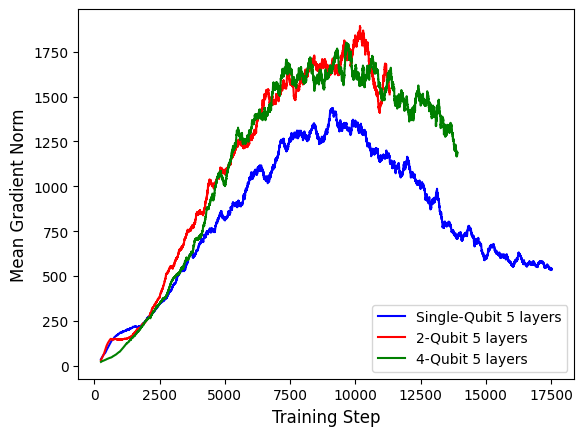

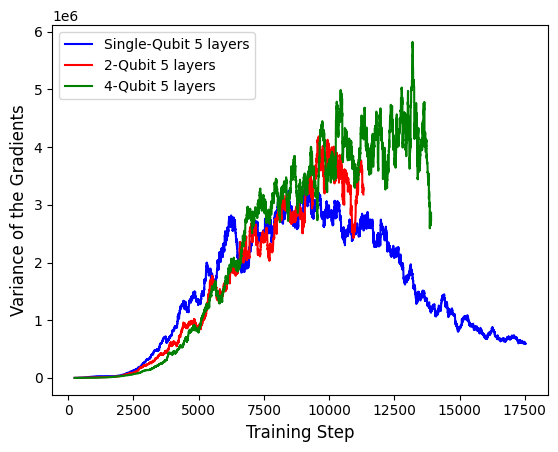

In [73]:
plt.plot(mean_gradients_single_qubit_smoothed, color='blue', linewidth=1.5, label='Single-Qubit 5 layers')
plt.plot(mean_gradients_2qubits_smoothed, color='red', linewidth=1.5, label='2-Qubit 5 layers')
plt.plot(mean_gradients_4qubits_smoothed, color='green', linewidth=1.5, label='4-Qubit 5 layers')
plt.xlabel('Training Step', fontsize=12)
plt.ylabel('Mean Gradient Norm', fontsize=12)
plt.legend()
plt.show()

plt.plot(variance_gradients_single_qubit_smoothed, color='blue', linewidth=1.5, label='Single-Qubit 5 layers')
plt.plot(variance_gradients_2qubits_smoothed, color='red', linewidth=1.5, label='2-Qubit 5 layers')
plt.plot(variance_gradients_4qubits_smoothed, color='green', linewidth=1.5, label='4-Qubit 5 layers')
plt.xlabel('Training Step', fontsize=12)
plt.ylabel('Variance of the Gradients', fontsize=12)
plt.legend()

In [12]:
#function to see when each of the models converged

def find_episode_solved(results):
    episodes = []
    for result in results:
        for i in range(25,len(result)):
            if result[i] > 195:
                episodes.append(i)

In [13]:
print(find_episode_solved(uqc_1qubits_moving_average))

None


In [14]:
uqc_1qubits_moving_average[0][250]

114.92